In [3]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates
from datetime import datetime
from sklearn import linear_model

In [ ]:
#Preprocessing data
df = pd.read_excel('Problem_C_Data_Wordle.xlsx') #load in excel file
df = df.drop(df.columns[[0]], axis=1)  # drop the first NaN containing columns
df.columns = df.iloc[0] #rename dataframe columns to the ones in the excel
df.drop(index=0) #drop the extra first row

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1
356,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2
357,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4
358,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2


In [ ]:
df.describe()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
count,360,360,360,360,360,360,360,360,360,360,360,360
unique,360,360,360,358,345,7,23,37,33,32,31,22
top,Date,Contest number,Word,36223,10343,0,2,16,35,24,9,1
freq,1,1,1,2,2,221,56,19,38,32,30,146


In [ ]:
column_names = list(df.columns.values)
column_names

['Date',
 'Contest number',
 'Word',
 'Number of  reported results',
 'Number in hard mode',
 '1 try',
 '2 tries',
 '3 tries',
 '4 tries',
 '5 tries',
 '6 tries',
 '7 or more tries (X)']

## Daily reports

In [ ]:
indx = list(df["Contest number"].to_numpy()[1:])
number_of_results = list(df["Number of  reported results"].to_numpy()[1:])
number_of_hard_results = list(df["Number in hard mode"].to_numpy()[1:])

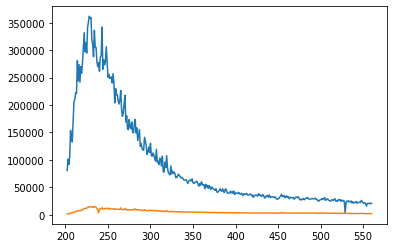

In [ ]:
plt.plot(indx, number_of_results)
plt.plot(indx, number_of_hard_results)

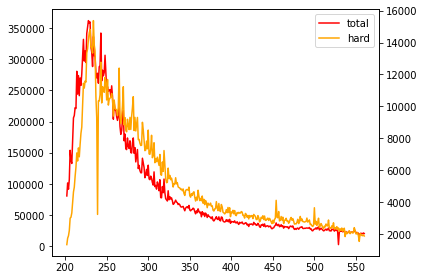

In [ ]:
plt.rcParams["figure.autolayout"] = True
ax1 = plt.subplot()
l1, = ax1.plot(indx, number_of_results, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(indx, number_of_hard_results, color='orange')

plt.legend([l1, l2], ["total", "hard"])

plt.show()

In [ ]:
'''
simple_date_times = pd.to_datetime(df['Date'].str[:-9])
print(simple_date_times[0])
#dates = matplotlib.dates.date2num(simple_date_times)
plt.plot(simple_date_times,
         df['Number of  reported results'])
'''

"\nsimple_date_times = pd.to_datetime(df['Date'].str[:-9])\nprint(simple_date_times[0])\n#dates = matplotlib.dates.date2num(simple_date_times)\nplt.plot(simple_date_times,\n         df['Number of  reported results'])\n"

## Regression on number of players

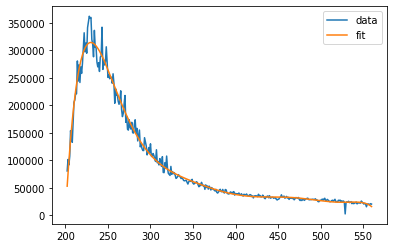

In [ ]:
#Fitting using polynomial regression
poly = np.polyfit(list(indx), list(number_of_results), deg=8)

fig, ax = plt.subplots()
ax.plot(indx, number_of_results, label='data')
ax.plot(indx, np.polyval(poly, indx), label='fit')
ax.legend()

Let's try to predict the rating of a movie based on the 10 movies that are "nearest" to it in terms of their genres and ratings.

To begin, let's load up our pandas dataframe with the MovieLens 100K data set.

In [ ]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx') #load in excel file
df = df.drop(df.columns[[0]], axis=1)  # drop the first NaN containing columns
df.columns = df.iloc[0] #rename dataframe columns to the ones in the excel
df.drop(index=0) 


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1
356,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2
357,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4
358,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2


Group by 4 tries

In [ ]:
pd.to_numeric(df.columns[3], errors ='ignore')
playerProperties = df.groupby('4 tries').agg({'Number of  reported results': [np.size, np.mean]})
playerProperties.head()

TypeError: ignored

create a data frame that normalizes each number of 

In [ ]:
playersNumRatings = pd.DataFrame(playersProperties['Number of reported results']['size'])
playersNormalizedNumRatings = playersNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
playersNormalizedNumRatings.head()

In [ ]:
triesDict = {}
with open(r'Problem_C_Data_Wordle.xlsx') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        fourtries = int(fields[0])
        name = fields[1]
        genres = fields[1:26]
        genres = map(int, genres)
        triesDict[fourtries] = (name, np.array(list(genres)), playersNormalizedNumRatings.loc[fourtries].get('size'), playersProperties.loc[fourtries].rating.get('mean'))

In [ ]:
triesDict[1]

In [ ]:
from scipy import spatial
import math

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    overallDistance = math.sqrt((genreDistance ** 2) + (popularityDistance ** 2))
    return overallDistance

In [ ]:
ComputeDistance(triesDict[2], triesDict[4])

In [ ]:
import operator

def getNeighbors(fourtries, K):
    distances = []
    for tries in fourtries:
        if (tries != fourtries):
            dist = ComputeDistance(triesDict[fourtries], movieDict[tries])
            distances.append((tries, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

In [ ]:
K = 5

print (str(K) + " Nearest Neigbors: ")
print (" ")

sumPlayers = 0
neighbors = getNeighbors(1, K)
for neighbor in neighbors:
    sumPlayers += triesDict[neighbor][3]
    print (triesDict[neighbor][0] + " " + str(triesDict[neighbor][3]))
    
avgPlayers = sumPlayers / K
print (" ")
print ("Average Rating of the " + str(K) + " Nearest Neigbors: " + str(avgPlayers))

In [ ]:
print (triesDict[1][0] + " " + str(triesDict[1][3]))

In [8]:
pd.read_csv('u.data')

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806
...,...
99994,880\t476\t3\t880175444
99995,716\t204\t5\t879795543
99996,276\t1090\t1\t874795795
99997,13\t225\t2\t882399156
